In [1]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years': years, 'durations': durations}

# Print the dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


In [2]:
# Import pandas under its usual alias
import pandas as pd
%matplotlib inline
# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


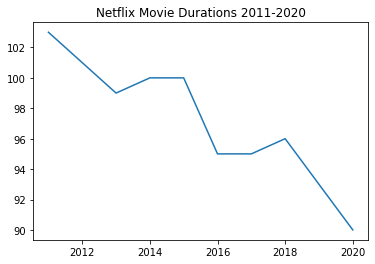

In [3]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years, durations)

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

In [4]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv") 

# Print the first five rows of the DataFrame
netflix_df[:5]
#netflix_df.iloc[:5,]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [5]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df.query('type == "Movie"')

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()


,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [6]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset[0:5]

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [7]:
x = netflix_df[netflix_df['type'] == 'Movie'][['title', 'country', 'genre', 'release_year', 'duration']].head()
x

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [8]:
netflix_movies_col_subset.shape

(5377, 5)

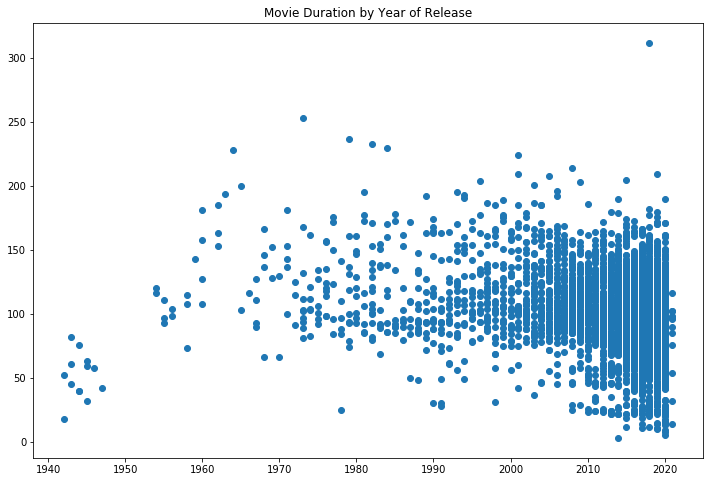

In [9]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

# Create a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

In [10]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]
#short_movies = netflix_movies_col_subset.query('duration < 60')

# Print the first 10 rows of short_movies
short_movies[0:10]

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [11]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == "Children":
        colors.append("red")
    elif row['genre'] == "Documentaries":
        colors.append("blue")
    elif row['genre'] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")

# Inspect the first 10 values in your list      
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

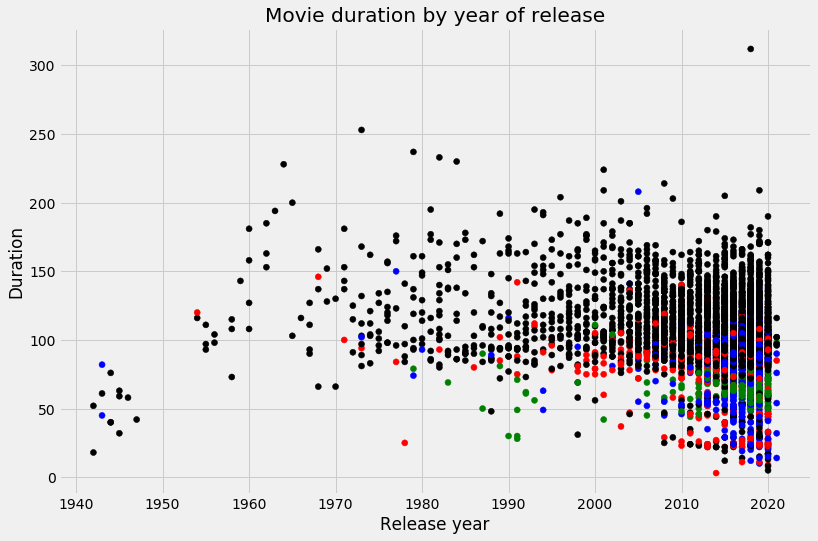

In [12]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
legends = ['Children', 'Documentaries', 'Stand-up', 'Others']

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c = colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration")

# Show the plot
plt.show()

In [13]:
# Are we certain that movies are getting shorter?
# are_movies_getting_shorter = "maybe"

In [14]:
# Subset the DataFrame for type "US Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']
netflix_df_us_movies_only = netflix_df_movies_only[netflix_df_movies_only['country'] == 'United States' ]
netflix_df_us_movies_only.head(20)

# Select only the columns of interest
netflix_us_movies = netflix_df_us_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_us_movies[0:5]

,title,country,genre,release_year,duration
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
7,187,United States,Dramas,1997,119
10,1922,United States,Dramas,2017,103
14,3022,United States,Independent Movies,2019,91


In [15]:
result = netflix_us_movies.groupby('genre').mean()
long_genre = result[result['duration'] > 50]
print(long_genre)


                    release_year    duration
genre                                       
Action               2008.922449  108.428571
Children             2011.917241   79.441379
Classic Movies       1968.404762  103.880952
Comedies             2012.445122   96.576220
Cult Movies          1990.111111   97.888889
Documentaries        2016.128463   81.372796
Dramas               2012.984085  104.965517
Horror Movies        2014.414414   92.117117
Independent Movies   2016.000000   98.000000
Music                2016.600000   85.000000
Romantic Movies      2017.500000   83.000000
Sci-Fi               2011.833333  109.833333
Stand-Up             2014.449275   67.256039
Thrillers            2013.300000   97.775000


In [16]:
x = long_genre.index
x

Index(['Action', 'Children', 'Classic Movies', 'Comedies', 'Cult Movies',
       'Documentaries', 'Dramas', 'Horror Movies', 'Independent Movies',
       'Music', 'Romantic Movies', 'Sci-Fi', 'Stand-Up', 'Thrillers'],
      dtype='object', name='genre')

In [17]:
y = long_genre['duration']
y

genre
Action                108.428571
Children               79.441379
Classic Movies        103.880952
Comedies               96.576220
Cult Movies            97.888889
Documentaries          81.372796
Dramas                104.965517
Horror Movies          92.117117
Independent Movies     98.000000
Music                  85.000000
Romantic Movies        83.000000
Sci-Fi                109.833333
Stand-Up               67.256039
Thrillers              97.775000
Name: duration, dtype: float64

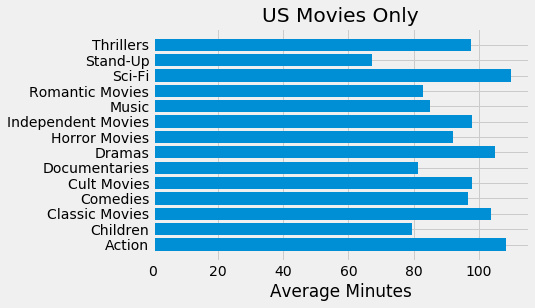

In [18]:
plt.barh(x,y)
plt.title('US Movies Only')
plt.xlabel('Average Minutes')
plt.show()

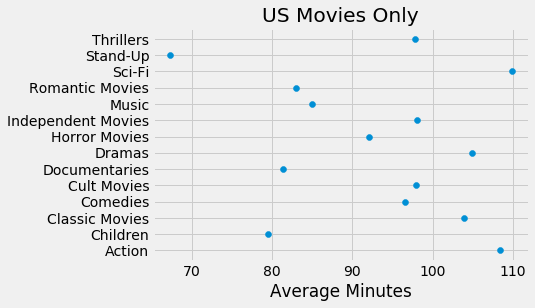

In [19]:
plt.scatter(y,x)
plt.title('US Movies Only')
plt.xlabel('Average Minutes')
plt.show()

In [20]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


In [21]:
import numpy as np
netflix_year16to20 = netflix_df[np.logical_and(netflix_df['release_year']>2015, netflix_df['release_year']<2021)][['title', 'country', 'genre', 'release_year', 'duration']]
netflix_year16to20

,title,country,genre,release_year,duration
0,3%,Brazil,International TV,2020,4
1,7:19,Mexico,Dramas,2016,93
5,46,Turkey,International TV,2016,1
6,122,Egypt,Horror Movies,2019,95
8,706,India,Horror Movies,2019,118
...,...,...,...,...,...
7779,Zona Rosa,Mexico,International TV,2019,1
7780,Zoo,India,Dramas,2018,94
7784,Zulu Man in Japan,NaN,Documentaries,2019,44
7785,Zumbo's Just Desserts,Australia,International TV,2019,1


In [22]:
a = netflix_year16to20.groupby('country').count()
a

,title,genre,release_year,duration
country,,,,
Argentina,55,55,55,55
Australia,74,74,74,74
Austria,7,7,7,7
Bangladesh,2,2,2,2
Belarus,1,1,1,1
...,...,...,...,...
United States,1776,1776,1776,1776
Uruguay,8,8,8,8
Venezuela,1,1,1,1


In [23]:
a.sort_values(by = 'title', inplace = True, ascending = False)
result = a.head(10)[['title']]
result.head()


,title
country,
United States,1776
India,434
United Kingdom,360
Canada,186
Spain,148


<BarContainer object of 10 artists>

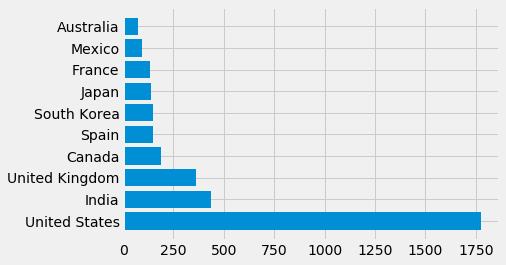

In [24]:
x = result['title']
y = result.index
plt.barh(y,x)

In [25]:
two2four = result.iloc[1:4,:]
two2four

,title
country,
India,434
United Kingdom,360
Canada,186


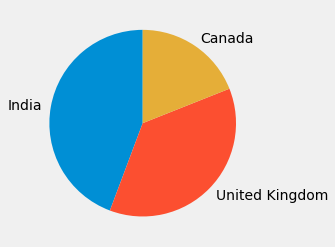

In [26]:
plt.pie(two2four['title'], labels = two2four.index, startangle = 90)
plt.show()

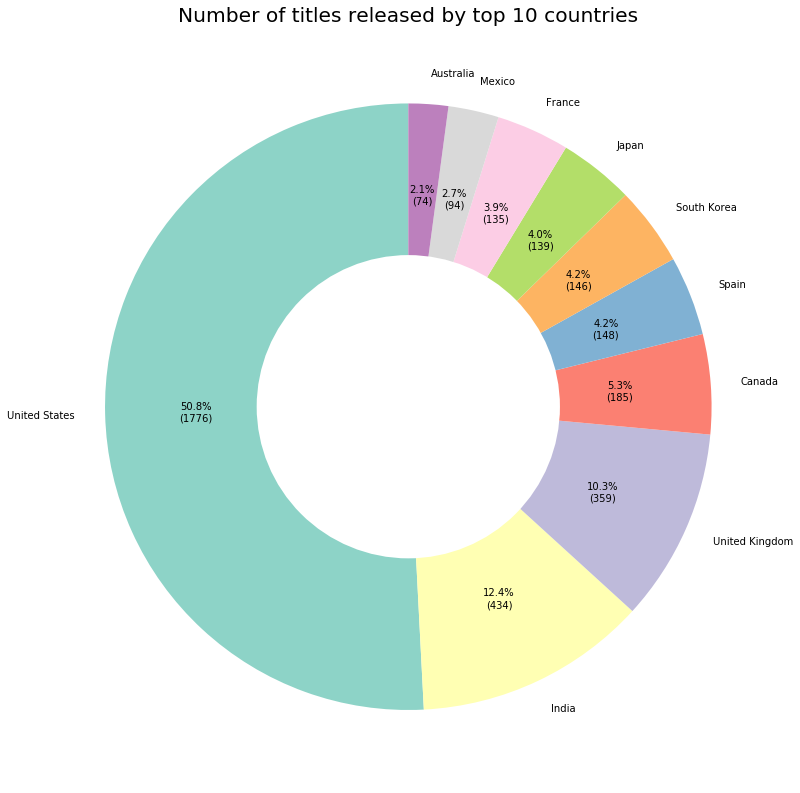

In [29]:
import seaborn as sns
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#plt.figure(figsize=(9,9))
fig = plt.figure(figsize=(13,13))
fig.patch.set_facecolor('white')
labels = result.index
#explodes = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
plt.pie(result['title'], labels = result.index, startangle = 90, 
        autopct = lambda pct: func(pct, result['title']), pctdistance=0.70, 
        textprops={'fontsize':10}, 
        colors=sns.color_palette('Set3'))
plt.title('Number of titles released by top 10 countries')


hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

In [17]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_US_movie_50up = netflix_df[(netflix_df['type'] == 'Movie') & 
                                   (netflix_df['country'] == 'United States') & 
                                   (netflix_df['duration'] > 50)]
netflix_US_movie_50up[['title', 'country', 'genre', 'release_year', 'duration']].head()

,title,country,genre,release_year,duration
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
7,187,United States,Dramas,1997,119
10,1922,United States,Dramas,2017,103
14,3022,United States,Independent Movies,2019,91


In [ ]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_US = netflix_df[netflix_df['country'] == 'United States']
netflix_US_movie = netflix_US
netflix_US_movie_50up = netflix_US_movie

netflix_US_movie_50up[['title', 'country', 'genre', 'release_year', 'duration']].head()